In [5]:
#From VCF Test
# Simple script that contains tools for testing vcf file reading and writing 

import allel as al # Used for VCF file manipulation
import os

TEST_FILE = os.path.realpath("./Data/afr-small.vcf") # Path to the vcf file used for testing

def getData()->dict:
    return al.read_vcf(TEST_FILE)


if __name__ == "__main__":
    data = getData()
    df = al.vcf_to_dataframe(TEST_FILE)
    print("This is df \n:", df)
    print("These are the data keys: \n", data.keys())
    print("Size = ",df.size)
    print("Shape (num rows & cols) = ",df.shape)
    print("Dimensions = ", df.ndim)
    
    # Searches the "QUAL" col for data of a quality: 30% < data <35%, and at a "POS" lower than 15 000
    bool_search = (df["QUAL"].between(30, 35, inclusive = 'both')) & (df["POS"]<15000)
    bool_search = (df["POS"]<15000)
    
    new_df = df[bool_search]
    print("------\n\nthis is 'new_df': \n ", new_df)  # Size = 0
    new_df_qual = new_df.sort_values(by=["QUAL"], ascending=True)
    new_df_POS = new_df.sort_values(by=["POS"], ascending=True)
    

    print("------\nThis is 'new_df_qual. index': \n", new_df_qual.index) #Query the indexes from the dataframe 
    print("------\nThis is 'new_df_POS. index': \n", new_df_POS.index) #Query the indexes from the dataframe 
    
    # print("------\nThis is 'new_df_POS. index': \n", new_df_REF) #Query the indexes from the dataframe 
    # print("------\nThis is 'new_df_REF_A': \n", new_df_REF_A) 
    # print("------\nThis is 'new_df_REF_A indexes': \n", new_df_REF_A.index) 
     
    # Use the dataframe index to access rows (or columns) for the genotype array
    #print(al.GenotypeArray(data['calldata/GT'])[new_df.index,:])

    #print(len(max(data['variants/REF'], key=len)))
    # print((max(data['variants/REF'], key=len)))
    # print(len(data['variants/REF']))
    #print(data['samples'])

This is df 
:      CHROM     POS           ID  REF ALT_1 ALT_2 ALT_3   QUAL  FILTER_PASS
0        9   10163            .   CT     C   NaN   NaN  100.0         True
1        9   10273            .  AAC     A   NaN   NaN  100.0         True
2        9   10327            .    T     C   NaN   NaN  100.0         True
3        9   10329            .    A     G   NaN   NaN  100.0         True
4        9   10362  rs141734683    C    CT   NaN   NaN  100.0         True
...    ...     ...          ...  ...   ...   ...   ...    ...          ...
1743     9  102730  rs139336184    T     C   NaN   NaN  100.0         True
1744     9  102770  rs144149065    T     C   NaN   NaN  100.0         True
1745     9  102798  rs186477530    A     G   NaN   NaN  100.0         True
1746     9  102814            .    T     A   NaN   NaN  100.0         True
1747     9  102827            .    G     T   NaN   NaN  100.0         True

[1748 rows x 9 columns]
These are the data keys: 
 dict_keys(['samples', 'calldata/GT

 #### Only for REF containing A:

In [6]:
df_REF = new_df.sort_values(by=["REF"], ascending=True)
df_REF_A = df_REF[df_REF['REF'].isin(['A'])]


# print("------\nThis is 'new_df_qual. index': \n", new_df_qual.index) #Query the indexes from the dataframe 
# print("------\nThis is 'new_df_POS. index': \n", new_df_POS.index) #Query the indexes from the dataframe 
# print("------\nThis is 'new_df_REF. index': \n", new_df_REF) #Sorts the dataframe according to REF alphabetically 
print("------\nThis is 'new_df_REF_A': \n", df_REF_A) 
print("------\nThis is 'new_df_REF_A indexes': \n", df_REF_A.index) 

------
This is 'new_df_REF_A': 
    CHROM    POS           ID REF ALT_1 ALT_2 ALT_3   QUAL  FILTER_PASS
55     9  13953            .   A     G   NaN   NaN  100.0         True
32     9  10892            .   A     G   NaN   NaN  100.0         True
3      9  10329            .   A     G   NaN   NaN  100.0         True
35     9  10960            .   A     T   NaN   NaN  100.0         True
49     9  12306  rs201304119   A     C   NaN   NaN  100.0         True
60     9  14323            .   A     C   NaN   NaN  100.0         True
75     9  14863   rs71509923   A     C     G   NaN  100.0         True
79     9  14889   rs71509924   A     G   NaN   NaN  100.0         True
------
This is 'new_df_REF_A indexes': 
 Index([55, 32, 3, 35, 49, 60, 75, 79], dtype='int64')


 #### Only for REF containing C:

In [7]:
#df_REF_C = df_REF[df_REF['REF'].isin(['C'])] #uses a scatter method, therefore random index order
##.loc is better b/c ascending
df_C = df.loc[df['REF'] =='C']

#print("------\nThis is 'new_df_REF_C': \n", df_REF_C)
print("------\nThis is 'df_C': \n", df_C) 
print("------\nThis is 'df_C indexes': \n", df_C.index) 

------
This is 'df_C': 
      CHROM     POS           ID REF ALT_1 ALT_2 ALT_3   QUAL  FILTER_PASS
4        9   10362  rs141734683   C    CT   NaN   NaN  100.0         True
9        9   10559            .   C     G   NaN   NaN  100.0         True
11       9   10582            .   C     G   NaN   NaN  100.0         True
12       9   10583            .   C     T   NaN   NaN  100.0         True
15       9   10594            .   C     T   NaN   NaN  100.0         True
...    ...     ...          ...  ..   ...   ...   ...    ...          ...
1729     9  102508  rs191648706   C     T   NaN   NaN  100.0         True
1731     9  102562            .   C     G   NaN   NaN  100.0         True
1737     9  102702   rs62532145   C     T   NaN   NaN  100.0         True
1739     9  102716            .   C     A   NaN   NaN  100.0         True
1741     9  102727            .   C     T   NaN   NaN  100.0         True

[477 rows x 9 columns]
------
This is 'df_C indexes': 
 Index([   4,    9,   11,   12,

 #### Only for REF containing G:

In [8]:
df_REF_G = df_REF[df_REF['REF'].isin(['G'])]

print("------\nThis is 'new_df_REF_C': \n", df_REF_G) 
print("------\nThis is 'new_df_REF_C indexes': \n", df_REF_G.index) 

------
This is 'new_df_REF_C': 
    CHROM    POS           ID REF ALT_1 ALT_2 ALT_3   QUAL  FILTER_PASS
48     9  12129            .   G     T   NaN   NaN  100.0         True
68     9  14765            .   G     A   NaN   NaN  100.0         True
54     9  12982            .   G     A   NaN   NaN  100.0         True
69     9  14782            .   G     C   NaN   NaN  100.0         True
70     9  14784            .   G     A   NaN   NaN  100.0         True
72     9  14822            .   G     A   NaN   NaN  100.0         True
74     9  14859  rs377032602   G     A   NaN   NaN  100.0         True
76     9  14880            .   G     A   NaN   NaN  100.0         True
77     9  14885            .   G     A   NaN   NaN  100.0         True
57     9  14157            .   G     C   NaN   NaN  100.0         True
66     9  14723            .   G     A   NaN   NaN  100.0         True
40     9  11369            .   G     C   NaN   NaN  100.0         True
27     9  10765            .   G     C   NaN

 #### Only for REF containing T:

In [9]:
df_REF_T = df_REF[df_REF['REF'].isin(['T'])]

print("------\nThis is 'new_df_REF_C': \n", df_REF_T) 
print("------\nThis is 'new_df_REF_C indexes': \n", df_REF_T.index) 

------
This is 'new_df_REF_C': 
    CHROM    POS ID REF ALT_1 ALT_2 ALT_3   QUAL  FILTER_PASS
2      9  10327  .   T     C   NaN   NaN  100.0         True
6      9  10498  .   T     A   NaN   NaN  100.0         True
61     9  14326  .   T     C   NaN   NaN  100.0         True
29     9  10784  .   T     A   NaN   NaN  100.0         True
67     9  14741  .   T     A   NaN   NaN  100.0         True
56     9  13962  .   T     C   NaN   NaN  100.0         True
33     9  10894  .   T     C   NaN   NaN  100.0         True
46     9  12033  .   T     C   NaN   NaN  100.0         True
14     9  10593  .   T     C   NaN   NaN  100.0         True
45     9  11981  .   T     C   NaN   NaN  100.0         True
------
This is 'new_df_REF_C indexes': 
 Index([2, 6, 61, 29, 67, 56, 33, 46, 14, 45], dtype='int64')


### Exclude REF nucleotide sequences:

In [10]:
#filtering out single allele mutations:
#noA = (df_REF_A.index.sort_values(ascending=True))
#noC = (df_REF_C.index.sort_values(ascending=True))
#noG = (df_REF_G.index.sort_values(ascending=True))
#noT = (df_REF_T.index.sort_values(ascending=True))

nuc_list = ['A','C','G','T']
noACGT = df[df["REF"].isin(nuc_list)==False] # df_REF_G.index and df_REF_T.index)
print(noACGT)
print("=========================")
only_long = df[[len(ref)>1 for ref in df["REF"]]]
long_2 = df[[len(ref)>2 for ref in df["REF"]]]
print(only_long)
print("-------------\n\n",long_2)
# print("A: \n",noA, "\n")
# print("A rows: \n", df_REF_A[0 :]  )
# print("C: \n",noC, "\n")
# print("G: \n",noG, "\n")
# print("T: \n",noT, "\n")

     CHROM    POS           ID           REF      ALT_1          ALT_2 ALT_3  \
0        9  10163            .            CT          C            NaN   NaN   
1        9  10273            .           AAC          A            NaN   NaN   
131      9  17614  rs202192731            CT          C            NaN   NaN   
358      9  45079   rs55984476            TC          T            NaN   NaN   
472      9  48464  rs113606208         ACATC          A            NaN   NaN   
560      9  52625            .            CA        CAA              C   NaN   
636      9  56012            .            GT          G            NaN   NaN   
726      9  59000            .        GTCTTC          G            NaN   NaN   
733      9  59345  rs202157231            TC          T            NaN   NaN   
750      9  60411            .            AT          A            NaN   NaN   
779      9  61163            .           GGA        AGA              G   NaN   
856      9  63639  rs199798080          

     CHROM    POS           ID           REF      ALT_1          ALT_2 ALT_3  \
0        9  10163            .            CT          C            NaN   NaN   
1        9  10273            .           AAC          A            NaN   NaN   
131      9  17614  rs202192731            CT          C            NaN   NaN   
358      9  45079   rs55984476            TC          T            NaN   NaN   
472      9  48464  rs113606208         ACATC          A            NaN   NaN   
560      9  52625            .            CA        CAA              C   NaN   
636      9  56012            .            GT          G            NaN   NaN   
726      9  59000            .        GTCTTC          G            NaN   NaN   
733      9  59345  rs202157231            TC          T            NaN   NaN   
750      9  60411            .            AT          A            NaN   NaN   
779      9  61163            .           GGA        AGA              G   NaN   
856      9  63639  rs199798080          

#### Plotting Variant Density:

In [11]:
#SETUP:

import numpy as np
#import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
#import h5py
import allel; print('scikit-allel', allel.__version__)
print(df)

scikit-allel 1.3.11
     CHROM     POS           ID  REF ALT_1 ALT_2 ALT_3   QUAL  FILTER_PASS
0        9   10163            .   CT     C   NaN   NaN  100.0         True
1        9   10273            .  AAC     A   NaN   NaN  100.0         True
2        9   10327            .    T     C   NaN   NaN  100.0         True
3        9   10329            .    A     G   NaN   NaN  100.0         True
4        9   10362  rs141734683    C    CT   NaN   NaN  100.0         True
...    ...     ...          ...  ...   ...   ...   ...    ...          ...
1743     9  102730  rs139336184    T     C   NaN   NaN  100.0         True
1744     9  102770  rs144149065    T     C   NaN   NaN  100.0         True
1745     9  102798  rs186477530    A     G   NaN   NaN  100.0         True
1746     9  102814            .    T     A   NaN   NaN  100.0         True
1747     9  102827            .    G     T   NaN   NaN  100.0         True

[1748 rows x 9 columns]


In [12]:
pos = df['POS'][:]
print(pos)
print(pos.ndim)

0        10163
1        10273
2        10327
3        10329
4        10362
         ...  
1743    102730
1744    102770
1745    102798
1746    102814
1747    102827
Name: POS, Length: 1748, dtype: int32
1


##### Defining a plot function:

In [76]:
def plot_windowed_variant_density(pos, window_size, title=None):
    
    # setup windows 
    bins = np.arange(0, pos.max(), window_size)
    
    # use window midpoints as x coordinate
    x = (bins[1:] + bins[:-1])/2
    
    # compute variant density in each window
    h, _ = np.histogram(pos, bins=bins)
    y = h / window_size
    print("h:\n", h, "Size:", h.shape)
    print("_:\n", _[:-1], "Size:", _[:-1].shape)
    print("x:\n",x, "Size:", x.shape)
    print("y:\n",y,"Size:", y.shape)
    # plot
    fig, ax = plt.subplots(figsize=(12, 3))
    #ax.plot(x, y)
    
    #ax.bar(x,y, align='edge')
    #ax.bar(_[:-1], h)
    ax.plot(_[:-1], h)
    
    #ax.pcolorfast([30,31])
    ax.set_xlabel('Chromosome position (bp)')
    ax.set_ylabel('Variant density (bp$^{-1}$)')
    if title:
        ax.set_title(title)

h:
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7 30  7  2
  4  5  0  2  6 18  2 10  3 10 23  3  0  0  0  0  0  1  0  0  2  0  1  2
  0  0  3  2  1  0  3  0  5  5  0  2  0  2  0  0  3  3  1  0  0  0  0  1
  0  0  0  0  1  1  7 11 19 11 29 12 28 12 10 18 18  9 16 18 14 16 22 18
 15 22  5  1 15 21  2  7 10 15  7 14 11 14 10  6  6 12 13 20 21 20  9  1
 21 11 26 22  9  8 18 12  7  7  6  7  0  0  0  9  5  6  2  9  5  8  2  9
  3 17 26 22 15  5 12 12  9  4 12  0  9 13  2  5  7 16 14 15 14  5 39 39
  2  4 10 14 17 17  6  9 19 10  5 12  7 14 11 16  8 10 24 12 18  8 11 20
  1  9 19 13 17  6 10 19 18 21 31 10 10] Size: (205,)
_:
 [     0    500   1000   1500   2000   2500   3000   3500   4000   4500
   5000   5500   6000   6500   7000   7500   8000   8500   9000   9500
  10000  10500  11000  11500  12000  12500  13000  13500  14000  14500
  15000  15500  16000  16500  17000  17500  18000  18500  19000  19500
  20000  20500  21000  21500  22000  22500  23000  23500  24000  24500

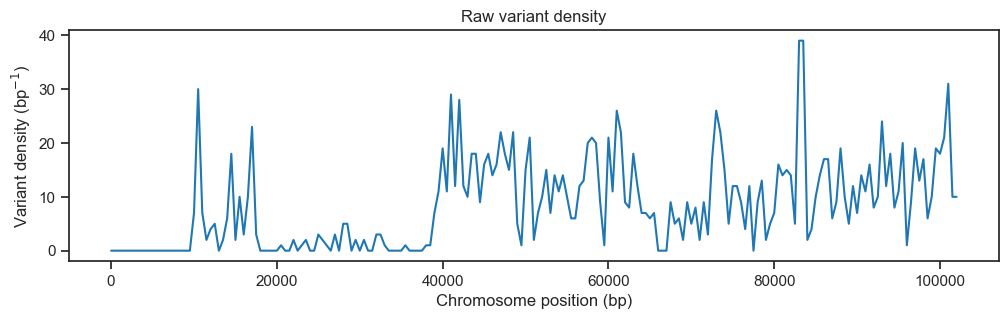

In [77]:
plot_windowed_variant_density(pos, window_size=500, title='Raw variant density') #500:100000  is a good ratio
#plot_windowed_variant_density(pos, window_size=1000, title='Raw variant density') #Too wide a window flattens it out
#fig=np.histogram(pos,np.arange(0, pos.max(), 1000))

#### Plotting a Histogram:

In [15]:
def plot_variant_hist(f, bins=30):
 x = df[f][:]
 fig, ax = plt.subplots(figsize=(13, 5))
 sns.despine(ax=ax, offset=5)
 ax.hist(x, bins=bins)
 ax.set_xlabel(f)
 ax.set_ylabel('No. variants')
 #ax.pcolor()
 ax.set_title('Variant %s distribution' % f)

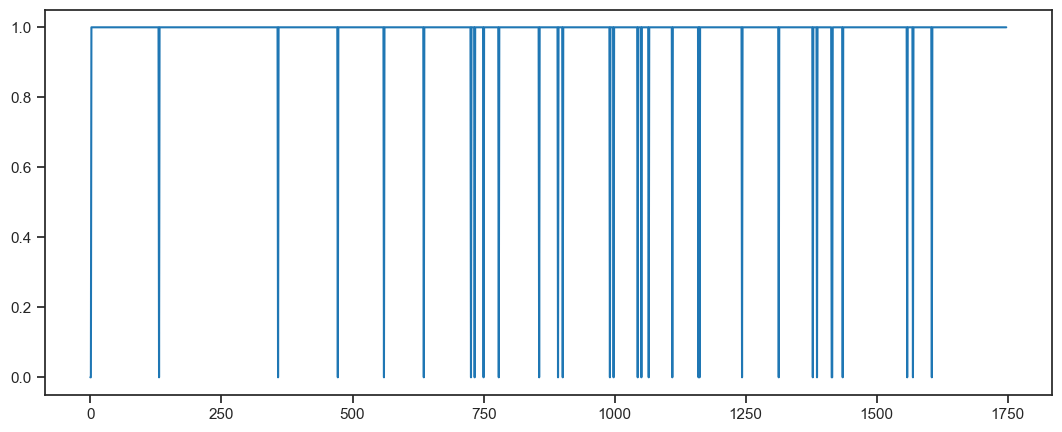

In [16]:
from matplotlib import colors

only_long = df[[len(ref)>1 for ref in df["REF"]]] #This doesn't work
only_long = [len(ref)>1 for ref in df["REF"]]
# long_2 = df[[len(ref)>2 for ref in df["REF"]]]
long_2 = [len(ref)>2 for ref in df["REF"]]
nuc_list = ['A','C','G','T']
noACGT = df[df["REF"].isin(nuc_list)==False]
#plot_variant_hist("REF", bins=50)
#plot_variant_hist("ALT_1", bins=50)

fig = mpl.figure.Figure(figsize=(13, 5),dpi = 100)
axis = fig.add_subplot(1,1,1)
axis.plot(df.index,only_long)

#fig.ax.plot()
ALLELE_COLORS = colors.ListedColormap(["#00000000","grey", "#29E838", "#E829D8", "#E89829", "#2979E8"])

only_few = [len(ref)<2 for ref in df["REF"]]
fig_few = mpl.figure.Figure(figsize=(13, 5),dpi = 100)
axis = fig_few.add_subplot(1,1,1)
axis.plot(df.index,only_few)

fig_long_2 = mpl.figure.Figure(figsize=(13, 5),dpi = 100)
axis = fig_long_2.add_subplot(1,1,1)
axis.plot(df.index,long_2)

fig_few

#HEAT MAP FOR LENGTH

#plot_variant_hist("ALT_2", bins=50)
#plot_variant_hist("ALT_3", bins=50)

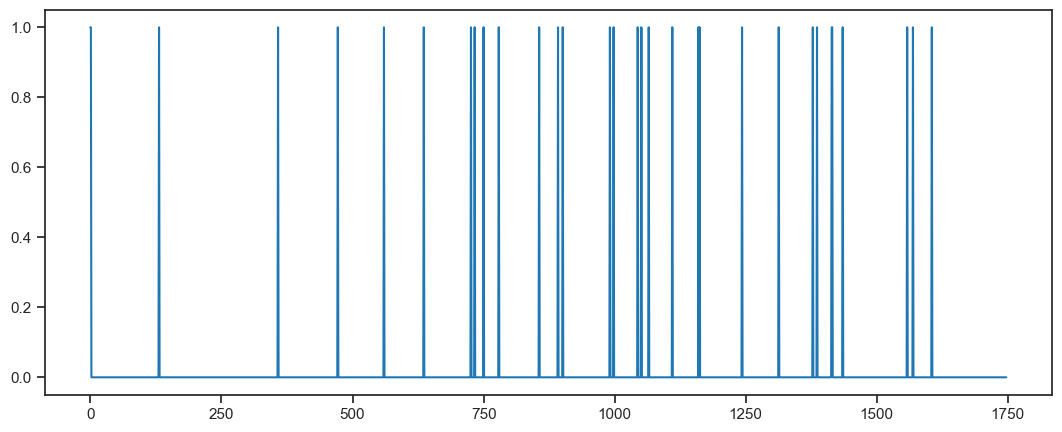

In [17]:
fig

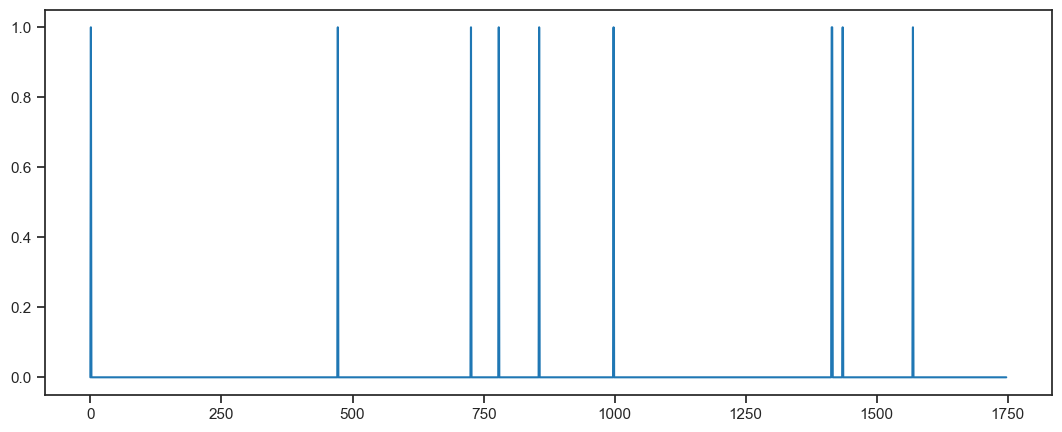

In [18]:
fig_long_2

In [19]:


from GVDashboard.Plot.plotInfo import ViewInfo_base
from GVDashboard.VCF.dataWrapper import VcfDataWrapper as DataWrapper
import GVDashboard.VCF.dataWrapper as dw
from GVDashboard.VCF.filterInfo import DataSetInfo

from matplotlib import colors
from matplotlib.figure import Figure as Figure
from matplotlib.axes import Axes as Axes
from matplotlib.gridspec import GridSpec as GridSpec
# ========================================================================
# ========================================================================

# Plotter for zygosity view
class VariantView(ViewInfo_base):
    def __init__(self) -> None:
        self.max_weight = 100
        self.colors = colors.ListedColormap(["#00000000","#002164", "g", "y"])
        super().__init__()
    def get_hight_weights(self,wrapped_data:DataWrapper) -> list[int]:
        return [min(wrapped_data.n_samples,self.max_weight)]
    def make_plots(self, fig: Figure, gs: GridSpec, start_index: int, wrapped_data: DataWrapper, ref_x:Axes|None)->Axes:
        axis = fig.add_subplot(gs[start_index], sharex = ref_x)
        p = axis.pcolorfast(np.matrix(wrapped_data.get_zygosity()), cmap=self.colors, vmax=2, vmin=-1)
        self.plots.append(p)
        return axis

ModuleNotFoundError: No module named 'VCF'

In [72]:
#poly_nucli_search = (df.index != (df_REF_A.index)) # or df_REF_C.index or df_REF_G.index or df_REF_T.index))

#bool_search = (df["REF"].drop ([noA, noC, noG, noT]))
#exclude_rows = ([noA, noC, noG, noT])
#print(exclude_rows)
New_df = df.drop("REF" =="A")
print(New_df)
# Then get a new dataframe by indexing useing the bool search
##New_df = df[bool_search]
#print(poly_nucli_search)
#df_allele = df[bool_search]

KeyError: '[False] not found in axis'

# Week 2 (Tuesday - Friday)

In [2]:
# This notebook serves as a testing space for visualiser functions
import numpy as np
##import scipy
#import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
import allel
import allel as al
import os
import seaborn as sns
print('scikit-allel', allel.__version__)

scikit-allel 1.3.11


In [3]:
#store VCF data as a variable:
from os import path
data_path = path.realpath("./Data/afr-small.vcf")
data_set = allel.read_vcf(data_path, fields = '*')

In [5]:
TEST_FILE = os.path.realpath("./Data/afr-small.vcf") # Path to the vcf file used for testing

def getData()->dict:
    return al.read_vcf(TEST_FILE)

   
if __name__ == "__main__":
    data = getData()
    df = al.vcf_to_dataframe(TEST_FILE)
    print(data.keys())
    bool_search = (df["QUAL"].between(30, 35, inclusive = 'both')) & (df["POS"]<15000)
    new_df = df[bool_search]
    print(new_df)

    #print(al.GenotypeArray(data['calldata/GT'])[bool_search,:])


dict_keys(['samples', 'calldata/GT', 'variants/ALT', 'variants/CHROM', 'variants/FILTER_PASS', 'variants/ID', 'variants/POS', 'variants/QUAL', 'variants/REF'])
Empty DataFrame
Columns: [CHROM, POS, ID, REF, ALT_1, ALT_2, ALT_3, QUAL, FILTER_PASS]
Index: []


##### VCF Data Keys

In [6]:
#Print all fields and key-value-pairs that can access NumPy array data 
sorted(data_set.keys())

['calldata/GT',
 'samples',
 'variants/AA',
 'variants/AC',
 'variants/AF',
 'variants/AFR_AF',
 'variants/ALT',
 'variants/AMR_AF',
 'variants/AN',
 'variants/CHROM',
 'variants/CIEND',
 'variants/CIPOS',
 'variants/CS',
 'variants/DP',
 'variants/EAS_AF',
 'variants/END',
 'variants/EUR_AF',
 'variants/FILTER_PASS',
 'variants/ID',
 'variants/IMPRECISE',
 'variants/MC',
 'variants/MEINFO',
 'variants/MEND',
 'variants/MLEN',
 'variants/MSTART',
 'variants/NS',
 'variants/POS',
 'variants/QUAL',
 'variants/REF',
 'variants/SAS_AF',
 'variants/SVLEN',
 'variants/SVTYPE',
 'variants/TSD',
 'variants/altlen',
 'variants/is_snp',
 'variants/numalt']

##### Store dictionary array keys as constants

In [7]:
# Constants used for indexing VCF dictionary
SAMPLES = 'samples'
DATA = 'calldata/GT'
ID = 'variants/ID'
REF = 'variants/REF'
ALT = 'variants/ALT'
POS = 'variants/POS'
QUAL = 'variants/QUAL'
FILT = 'variants/FILTER_PASS'

# Constants to index for VCF information annotations


To evaluate a population:
* First check 'samples', mark that position and then,
* pull all corresponding info from the other columns:
` 'calldata/GT', 'variants/ALT', 'variants/CHROM', 'variants/FILTER_PASS', 'variants/ID', 'variants/POS', 'variants/QUAL', 'variants/REF' `

In [ ]:
## For INFO & FORMAT strings

## For population seperation:
stringcontains
a = ['Geeks-13', 'for-56', 'Geeks-78', 'xyz-46']
for i in a:
    if i.__contains__("Geeks"):
        print(f"Yes! {i} is containing.")

# Iterating over a String
print("String Iteration")

s = "Geeks"
for i in s:
    print(i)
    
########


In [8]:
###What do data keys give:

#data_set['samples'] #samples from header lines   
## need to dtr max number of samples

#data_set['variants/CHROM']
# ## all data is for chromosome 9

#data_set['variants/POS']
## array([ 10163,  10273,  10327, ..., 102798, 102814, 102827], dtype=int32)  With gaps
##Consider gaps!!!!

#data_set['variants/QUAL']
## quality of data at each position

#data_set['calldata/GT']
##shows zygosity

#data_set[FILT]
## Gives true or false... 

#See GentotypeArray class documentation:
#https://scikit-allel.readthedocs.io/en/latest/model/ndarray.html#allel.model.ndarray.GenotypeArray

##### For Zygosity (Genotype) data

In [9]:
hetero_data = allel.GenotypeArray(data_set[DATA])
het_bool_array = hetero_data.is_het()

# Count heterozygous calls; Summing over variants (axis=0) or samples (axis=1)
hetero_data.count_het(axis=1)

array([10,  0,  1, ...,  0,  0,  1])

##### **For Frequency Filtering (code tut 2)**

In [45]:
# load all variant positions on chromosome 9
chrom = data_set['variants/CHROM']
pos_all = allel.SortedIndex(data_set['variants/POS'])
pos_all
##1748 positions in afr-small

0,1,2,3,4,...,1743,1744,1745,1746,1747
np.int32(10163),np.int32(10273),np.int32(10327),np.int32(10329),np.int32(10362),...,np.int32(102730),np.int32(102770),np.int32(102798),np.int32(102814),np.int32(102827)


In [55]:
vari_all = data_set['variants/AMR_AF']
vari_all


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       ...,
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32)

In [41]:
# Compress data??

genotype_all = allel.GenotypeChunkedArray(data_set['calldata/GT'])
genotype_all
# 503 indiv in the data

## Try to compress bigger dataset afr
#condition = genotype_all[:, :, 0]
#filtered_genotypes = genotype_all.compress(condition, axis=0)
#print(filtered_genotypes)

<GenotypeChunkedArray shape=(1748, 504, 2) dtype=int8
   nbytes=1.7M
   values=numpy.ndarray>

In [12]:
### load-in data from a specific chromosome

# Error: List, dictionary, set, etc. falls under the category of non hashable objects

# chrom = data_set['variants/CHROM']
# load all variant positions
# pos_all = allel.SortedIndex(data_set[chrom]['variants']['POS'])

In [28]:
#Metadat table of info???
#df_samples = pandas.read_csv('data/2015-09-21/samples.meta.txt', sep='\t', index_col='index')
#df_samples = allel.SortedIndex(

#these are empty arrays????
SNP_samples = data_set['variants/is_snp']
struct_info_1 = data_set['variants/SVLEN']
struct_info_2 = data_set['variants/SVTYPE']


array(['', '', '', ..., '', '', ''], dtype=object)

In [ ]:
def plot_fst(ac1, ac2, pos, blen=2000):
 
 fst, se, vb, _ = allel.stats.blockwise_hudson_fst(ac1, ac2, blen) #blen=blen
 
 # use the per-block average Fst as the Y coordinate
 y = vb
 
 # use the block centres as the X coordinate
 x = allel.stats.moving_statistic(pos, statistic=lambda v: (v[0] + v[-1]) / 2, size=blen)
 
 # plot
 fig, ax = plt.subplots(figsize=(10, 4))
 # sns.despine(ax=ax, offset=5)
 ax.plot(x, y, 'k-', lw=.5)
 ax.set_ylabel('$F_{ST}$')
 ax.set_xlabel('Chromosome 9 position (bp)')
 ax.set_xlim(0, pos.max())

#plot_fst(ac1, ac2, pos)

### Joshu's Zygosity Class from dataWrapper.py

In [ ]:
# Conatins vcf query data and returns it in various formats
class VcfDataWrapper:
    def __init__(self, vcf_data:dict) -> None:

        # Tmp data size constriants
        # TODO REMOVE THESE
        max_vars = 5000
        max_samples = 300

        vcf_data[SAMPLES] = vcf_data[SAMPLES][:max_samples]
        vcf_data[DATA] = vcf_data[DATA][:max_vars,:max_samples,]
        vcf_data[REF] = vcf_data[REF][:max_vars]
        vcf_data[ALT] = vcf_data[ALT][:max_vars]
        vcf_data[ID] = vcf_data[ID][:max_vars]
        
        # ------------------------
        self.data = vcf_data
        self.gt_data = GTArr(self.data[DATA])
        self.n_samples = len(vcf_data[SAMPLES])
        self.n_variants = len(vcf_data[ID])

        # clear pre-constructed arrays
        self._zygos = None
        self._refs = None
        self._alts = None

    # Returns a matrix of zygosities for each sample variant.
    # 0 = no mutation, 1 = heterozygous, 2 = homozygous mutation, -1 = no-data
    def get_zygosity(self):
        if self._zygos is None: # zygosity not pre-computed
            gt_data = self.gt_data
            self._zygos = gt_data.is_hom_alt()*2 + gt_data.is_het()*1 + gt_data.is_missing()*(-1)
        return self._zygos.transpose()[::-1,:] # Flip order so that firs entry is on the top
    
    # Returns a list indicating the nucleotide type of ref sequences
    # 0 = multi-nucleotide, -1 is no-data
    def get_ref(self):
        if self._refs is None:
            self._refs = alleles_to_numbs(self.data[REF])
        return self._refs

    def get_alt(self):
        if self._alts is None:
            self._alts = np.array([alleles_to_numbs(alts) for alts in self.data[ALT]])
            filter_mask = np.array([np.max(self._alts,axis=0) >= 0][0]) # filter out empty columns
            self._alts = self._alts[:,filter_mask].transpose()[::-1,:] # Put samples on the rows in descending order
        return self._alts

# Converts and allele character/string to an intagetr
# 0 = multi-nucleotide, -1 = n0-data
def allele_to_numb(a:str):
    if len(a) > 1:
        return 0
    elif NUCLEOTIDE_DICT.keys().__contains__(a):
        return NUCLEOTIDE_DICT[a]
    else:
        return -1
# Converts an array of alleles to numbers
def alleles_to_numbs(alleles:np.array):
    return [allele_to_numb(a) for a in alleles]
